In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# ISP Software Users
A ISP is conducting a experiment to check what version of a software is preferred by its users, there are 3 versions, the original and two newly developed ones, and the ISP identified 3 lurking variables: Age, Gender and hours of computer use.

We need to find out if randomizing the population and breaking into 3 groups for the experiment, will keep the distribution of the lurking variables somewhat the same. Knowing if the distribution is equal across the different groups, the ISP can have more confidence in the differences of preference detected with the experiment, and that it is not caused by lurking variables.

In [4]:
data = pd.read_excel('computers.xls')
data.head()

,Age,Gender,Comp
0,46,Female,2
1,76,Female,1
2,51,Female,6
3,62,Female,6
4,24,Female,12


In [6]:
data.dtypes

Age        int64
Gender    object
Comp       int64
dtype: object

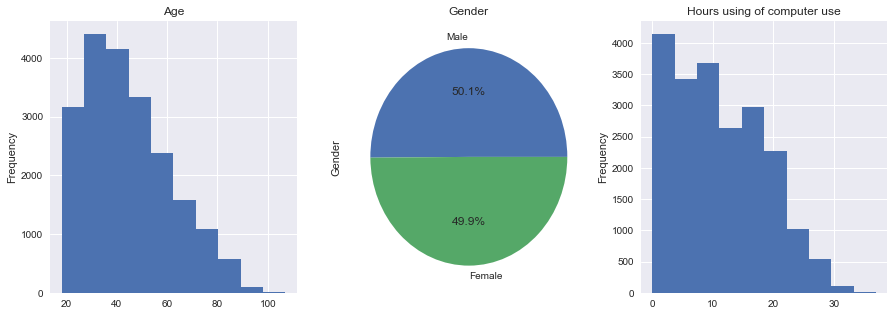

In [12]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15, 5))
ax0.set_title('Age')
ax1.set_title('Gender')
ax2.set_title('Hours using of computer use')
data.Age.plot.hist(ax=ax0)
data.Gender.value_counts().plot.pie(ax=ax1, autopct='%1.1f%%')
data.Comp.plot.hist(ax=ax2)

In [13]:
data.describe()

,Age,Comp
count,20783.000000,20783.000000
mean,44.273108,11.099937
std,17.070678,7.533505
min,18.000000,0.000000
25%,31.000000,5.000000
50%,41.000000,11.000000
75%,55.000000,17.000000
max,107.000000,37.000000


# Random Sample

Get 450 sample and split into 3 groups

In [72]:
sample = data.sample(450)
v1, v2, v3 = np.split(sample, 3)

## Compare groups distribution

### Compare age distribution

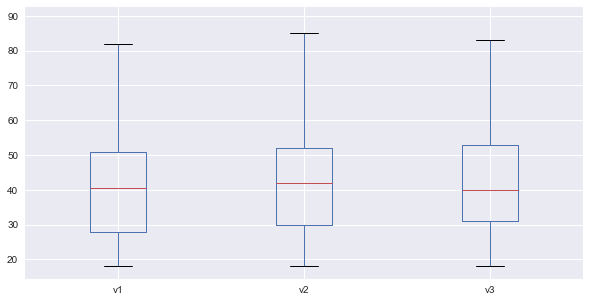

In [75]:
age_comparison = pd.concat([v1.Age.reset_index(drop=True), 
                            v2.Age.reset_index(drop=True), 
                            v3.Age.reset_index(drop=True)],
                           axis=1)
age_comparison.columns = ['v1', 'v2', 'v3']
age_comparison.plot.box(figsize=(10, 5))

In [77]:
age_comparison.describe()

,v1,v2,v3
count,150.000000,150.000000,150.000000
mean,42.873333,42.786667,43.073333
std,17.399104,14.979891,15.748057
min,18.000000,18.000000,18.000000
25%,28.000000,30.000000,31.000000
50%,40.500000,42.000000,40.000000
75%,51.000000,52.000000,53.000000
max,89.000000,88.000000,83.000000


Age groups are almost equally distributed across the 3 different groups.

### Compare gender distribution across the groups

In [87]:
gender_comparison = pd.concat([v1.Gender.value_counts(),
                               v2.Gender.value_counts(),
                               v3.Gender.value_counts()],
                              axis=1)
gender_comparison.columns = ['v1', 'v2', 'v3']
gender_comparison /= 150  # calculate percentages 150 individuals in each group
gender_comparison

,v1,v2,v3
Male,0.513333,0.513333,0.513333
Female,0.486667,0.486667,0.486667


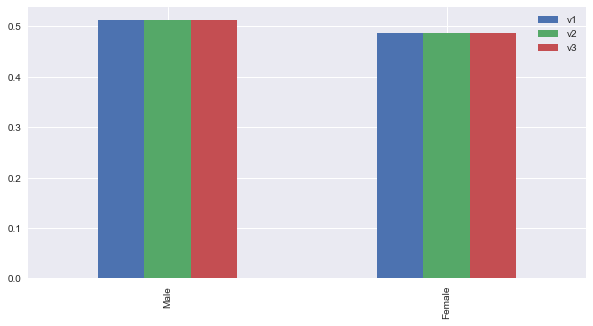

In [89]:
gender_comparison.plot.bar(figsize=(10, 5))

Gender is similarly distributed across the random sample groups.

### Compare hours of computer use

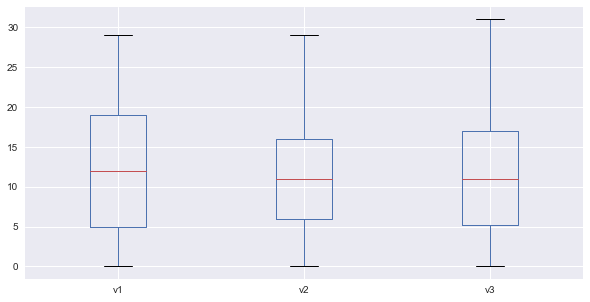

In [97]:
hour_comp = pd.concat([v1.Comp.reset_index(drop=True),
                       v2.Comp.reset_index(drop=True),
                       v3.Comp.reset_index(drop=True)],
                      axis=1)
hour_comp.columns = ['v1', 'v2', 'v3']
hour_comp.plot.box(figsize=(10, 5))

In [98]:
hour_comp.describe()

,v1,v2,v3
count,150.000000,150.000000,150.000000
mean,11.926667,11.440000,11.213333
std,7.939449,7.024865,7.645314
min,0.000000,0.000000,0.000000
25%,5.000000,6.000000,5.250000
50%,12.000000,11.000000,11.000000
75%,19.000000,16.000000,17.000000
max,29.000000,29.000000,31.000000


The distribution of hours of computer use is not very comparable across the 3 different groups. Q3 differs across the groups significantly, v1: 19, v2: 16 and v3:17.

# Conclusion

Distributions of age, gender and hours of computer use is comparable across the three groups randomly selected for the experiment. The ISP can have more confidence that the differences detected with the experiment is not caused by lurking variables.